# Task6: House Price Prediction

### Step1: Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


### Step 2: Load the Dataset

In [3]:
df = pd.read_csv('Housing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Step 3: Explore the Dataset

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mea

### Step 4: Handle Missing Values (if any)

In [11]:
# First, check for missing values
print(df.isnull().sum())

# If missing values exist in numerical columns, fill with median
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For binary categorical columns, fill missing with mode (if any)
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# For 'furnishingstatus', fill with mode as well (if needed)
df['furnishingstatus'] = df['furnishingstatus'].fillna(df['furnishingstatus'].mode()[0])


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


### Step 5: Define Features and Target

In [13]:
# Define the target variable
y = df['price']

# Define the feature set
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
        'basement', 'hotwaterheating', 'airconditioning', 'parking', 
        'prefarea', 'furnishingstatus']]


### Step 6: Preprocessing Pipeline

In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Numeric features
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Binary categorical features with yes/no values
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Multi-class categorical feature
multi_cat_features = ['furnishingstatus']

# Transformer to convert yes/no to 1/0
def yes_no_to_binary(X):
    return np.where(X == 'yes', 1, 0)

binary_transformer = FunctionTransformer(yes_no_to_binary)

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', binary_transformer, binary_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), multi_cat_features)
    ])


### Step 7: Train-Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 8: Build and Train Model

In [19]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('bin',
                                                  FunctionTransformer(func=<function yes_no_to_binary at 0x0000018989311580>),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['furnishingstatus'])])),
                ('regressor', LinearRegression())])

### Step 9: Make Predictions

In [21]:
y_pred = model.predict(X_test)


### Step 10: Evaluate Model Performance

In [23]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 970043.40
Root Mean Squared Error (RMSE): 1324506.96


### Step 11: Visualize Actual vs Predicted Prices

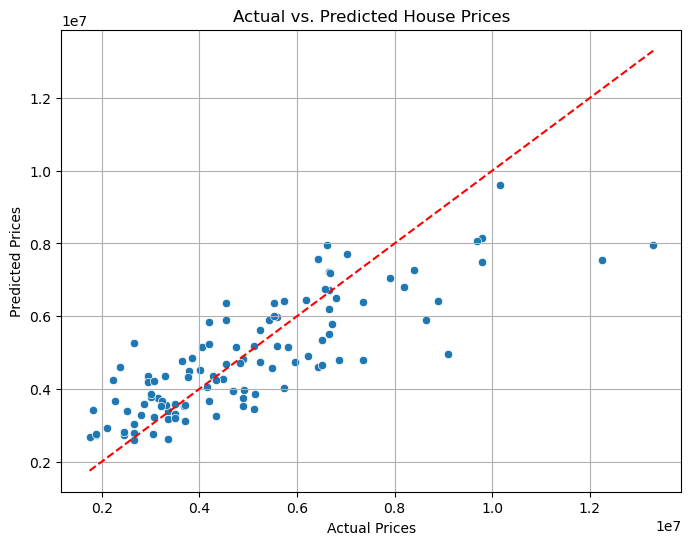

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()
